/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 70s 71ms/step - accuracy: 0.5821 - loss: 1.2286 - val_accuracy: 0.8113 - val_loss: 0.5139
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.7957 - loss: 0.5663 - val_accuracy: 0.8440 - val_loss: 0.4309
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.8277 - loss: 0.4824 - val_accuracy: 0.8569 - val_loss: 0.3948
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.8469 - loss: 0.4333 - val_accuracy: 0.8643 - val_loss: 0.3766
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.8531 - loss: 0.4135 - val_accuracy: 0.8714 - val_loss: 0.3579
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.8606 - loss: 0.3933 - val_accuracy: 0.8798 - val_loss: 0.3369
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.8689 - loss: 0.3687 - val_accuracy: 0.8843 - val_loss: 0.3208
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.8766 - loss: 0.3506 - 

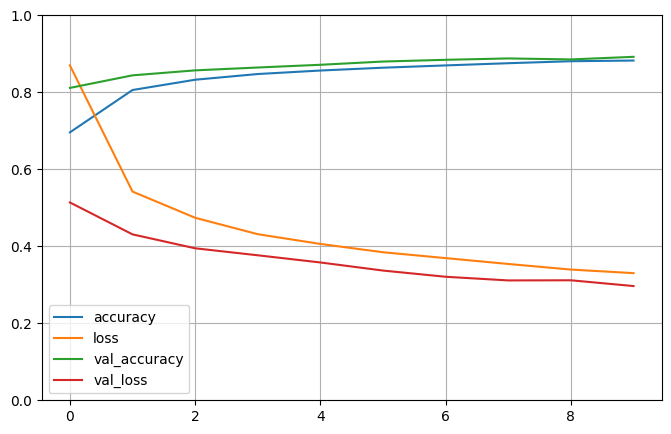

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.0001),
              metrics=["accuracy"])

history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training data for validation
    epochs=10,
    batch_size=50,
    verbose=1
)


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



In [5]:
loss , accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss} and Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8921 - loss: 0.3099
Test Loss: 0.31141844391822815 and Accuracy: 0.8883000016212463


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


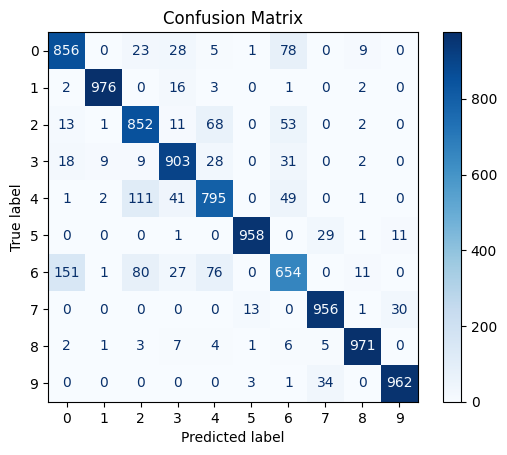

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test_labels = np.argmax(y_test, axis=-1)

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                               display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,264,928 (4.83 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,286 (3.22 MB)